In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder

from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer , SilhouetteVisualizer
from sklearn.metrics import silhouette_samples, silhouette_score

from sklearn.feature_selection import SelectKBest,chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SequentialFeatureSelector

from minisom import MiniSom
from sklearn_som.som import SOM
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, accuracy_score
from sklearn.utils.multiclass import unique_labels
from tqdm import tqdm

## 1. Load the Pokemon dataset and split features and labels for training and test sets.

In [2]:
train_df = pd.read_csv('Pokemon_train.csv')
test_df = pd.read_csv('Pokemon_test.csv')

### Encoder

In [3]:
ord_enc = OrdinalEncoder()
train_df["type1"] = ord_enc.fit_transform(train_df[["type1"]])
test_df["type1"] = ord_enc.fit_transform(test_df[["type1"]])
train_df["type1"] = train_df["type1"].astype("int")
test_df["type1"] = test_df["type1"].astype("int")
test_df.head()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,defense,experience_growth,height_m,hp,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1
0,1.000000,1.0,1.000000,2.000000,1.000000,2.000000,1.0,1.000000,1.0,2.000000,...,70.000000,1059860.0,1.100000,90.000000,50.000000,364.000000,75.000000,70.000000,45.000000,10
1,1.000000,1.0,0.677817,1.000000,1.677817,0.419454,1.0,1.677817,2.0,1.000000,...,75.668992,1250000.0,1.342253,58.334496,83.890827,412.496408,65.000000,95.668992,90.668992,13
2,1.000000,1.0,2.000000,0.179076,2.000000,1.000000,0.5,1.000000,1.0,0.820924,...,97.092392,1250000.0,2.652120,91.166848,50.000000,338.628806,102.092392,86.046196,84.120652,2
3,1.377154,0.5,1.000000,1.622846,2.000000,1.377154,1.0,1.000000,0.5,0.688577,...,55.017231,1059860.0,1.164008,84.913844,64.369564,483.178701,110.657309,55.017231,83.823233,1
4,1.000000,1.0,1.000000,0.000000,1.000000,2.000000,2.0,1.000000,1.0,2.000000,...,80.000000,1250000.0,2.500000,110.000000,50.000000,473.000000,70.000000,60.000000,80.000000,10


### Correlation

<AxesSubplot:>

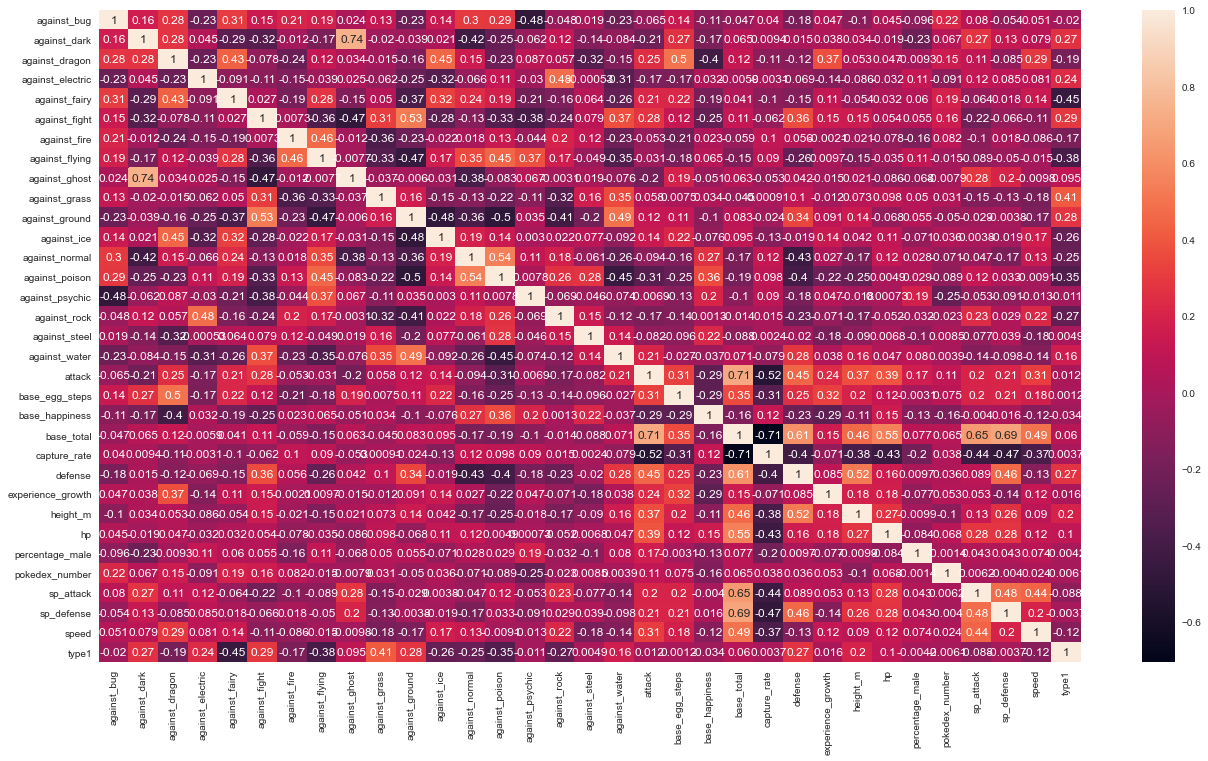

In [4]:
plt.figure(figsize=(22,12))
sns.heatmap(train_df.corr(), annot=True)

### Split Data 

In [5]:
X_train = train_df.iloc [: , 0:32]
y_train = train_df.iloc [: , -1]

X_test = test_df.iloc [: , 0:32]
y_test = test_df.iloc [: , -1]

##  2. Apply Gaussian Naïve Bayes classifier (GNB) and Support Vector Machine (SVM) to Pokemon dataset.

### Gaussian Naïve Bayes Classifier (GNB)


Classification Report:

              precision    recall  f1-score   support

           0       0.18      0.44      0.26        16
           1       1.00      0.60      0.75        20
           2       0.56      0.94      0.70        16
           3       0.23      0.44      0.30        16
           4       0.56      1.00      0.72         9
           5       0.83      0.86      0.84        22
           6       0.35      0.67      0.46        18
           7       0.57      0.47      0.52        17
           8       0.00      0.00      0.00        18
           9       0.50      0.86      0.63        21
          10       0.50      0.43      0.46        21
          11       0.00      0.00      0.00        24
          12       0.50      0.50      0.50        20
          13       0.71      0.22      0.33        23
          14       0.83      0.67      0.74        15
          15       1.00      1.00      1.00        19
          16       0.50      0.06      0.10        18

 

D:\Hagar\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


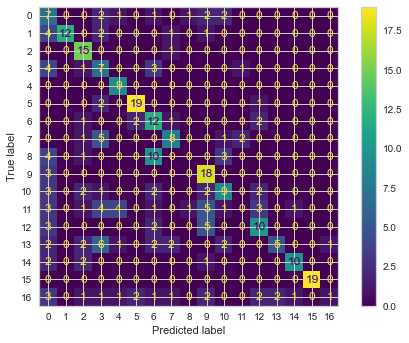

In [6]:
gnb_clf = GaussianNB()
gnb_clf.fit(X_train,y_train)
y_pred_gnb = gnb_clf.predict(X_test)
print('\nClassification Report:\n')
print(classification_report(y_test, y_pred_gnb))
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)*100
print(accuracy_gnb)
print('\nConfusion Matrix:\n')
plot_confusion_matrix(gnb_clf, X_test, y_test)

### SVM


Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.00      0.00      0.00        20
           2       0.29      0.94      0.44        16
           3       0.06      0.88      0.12        16
           4       0.22      1.00      0.36         9
           5       0.00      0.00      0.00        22
           6       0.00      0.00      0.00        18
           7       0.00      0.00      0.00        17
           8       0.00      0.00      0.00        18
           9       0.00      0.00      0.00        21
          10       0.00      0.00      0.00        21
          11       0.00      0.00      0.00        24
          12       0.00      0.00      0.00        20
          13       0.00      0.00      0.00        23
          14       0.00      0.00      0.00        15
          15       0.00      0.00      0.00        19
          16       0.00      0.00      0.00        18

 

D:\Hagar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Hagar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Hagar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Hagar\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: Fut

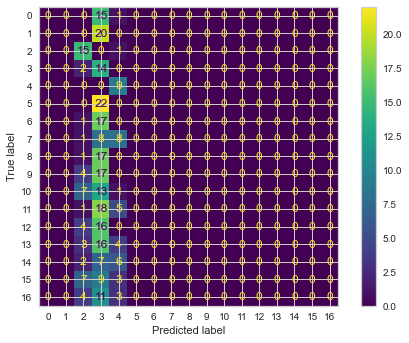

In [7]:
svm_model = svm.SVC(random_state=0)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
print('\nClassification Report:\n')
print(classification_report(y_test, y_pred_svm))
accuracy_svm = accuracy_score(y_test, y_pred_svm)*100
print(accuracy_svm)
print('\nConfusion Matrix:\n')
plot_confusion_matrix(svm_model, X_test, y_test)

### TSNE

In [8]:
tsne_model = TSNE(n_components= 2, random_state=0)
X_train_tsne = tsne_model.fit_transform(X_train)
X_test_tsne = tsne_model.fit_transform(X_test)
print('Shape of X_train:', X_train.shape)
print('Shape of X_train after tsne:', X_train_tsne.shape)

print('Shape of X_test:', X_train.shape)
print('Shape of X_test after tsne:', X_test_tsne.shape)

D:\Hagar\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
D:\Hagar\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
D:\Hagar\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
D:\Hagar\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Shape of X_train: (1251, 32)
Shape of X_train after tsne: (1251, 2)
Shape of X_test: (1251, 32)
Shape of X_test after tsne: (313, 2)


#### Plot Train Data After T-SNE

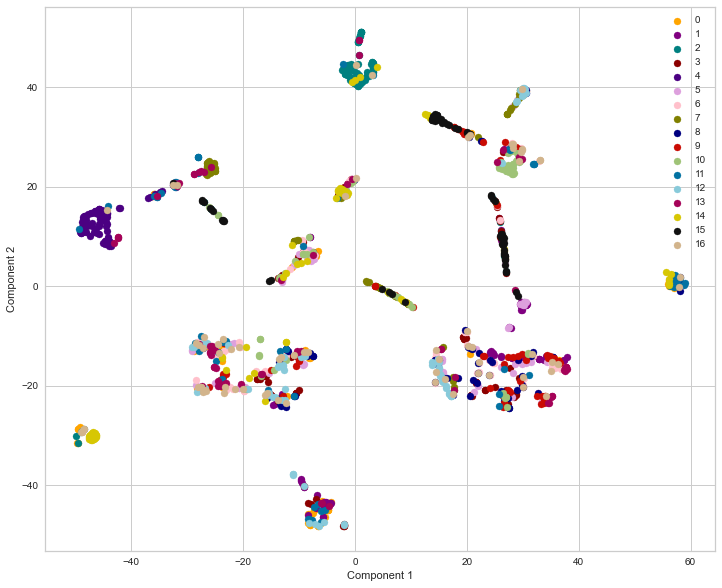

In [9]:
target_lbl = np.unique(train_df['type1'])
target_ids = range(len(target_lbl))

plt.figure(figsize=(12, 10))
colors = 'orange', 'purple', 'teal', 'darkred', 'indigo', 'plum', 'pink', 'olive', 'navy' , 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'tan' 
    
for i, c, label in zip(target_ids, colors, target_lbl):
    plt.scatter(X_train_tsne[y_train == i, 0], X_train_tsne[y_train == i, 1], c=c, label=label)

plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.legend()
plt.show()

#### Plot Test Data After T-SNE

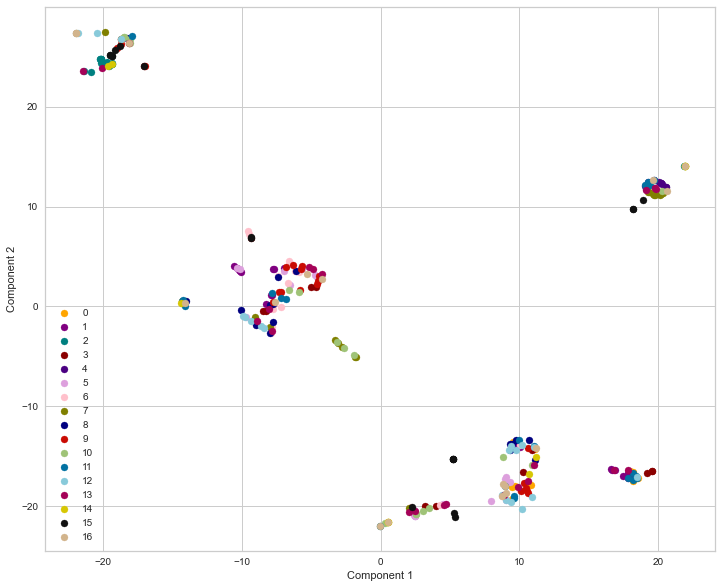

In [10]:
plt.figure(figsize=(12, 10))
colors = 'orange', 'purple', 'teal', 'darkred', 'indigo', 'plum', 'pink', 'olive', 'navy' , 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'tan'     

for i, c, label in zip(target_ids, colors, target_lbl):
    plt.scatter(X_test_tsne[y_test == i, 0], X_test_tsne[y_test == i, 1], c=c, label=label)

plt.xlabel("Component 1")
plt.ylabel("Component 2")    
plt.legend()
plt.show()

## 3. KMeans Clustering

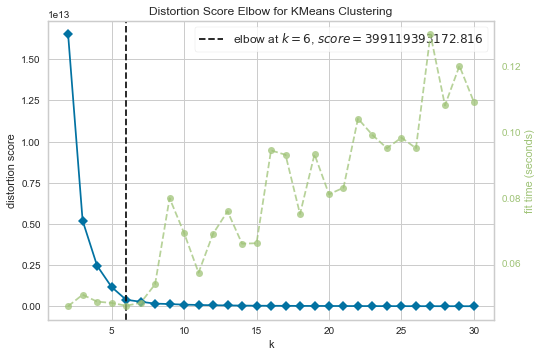

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [11]:
model = KMeans(random_state=0)
visualizer = KElbowVisualizer(model, k= (2,31), metric='distortion')
visualizer.fit(X_train)        
visualizer.show() 

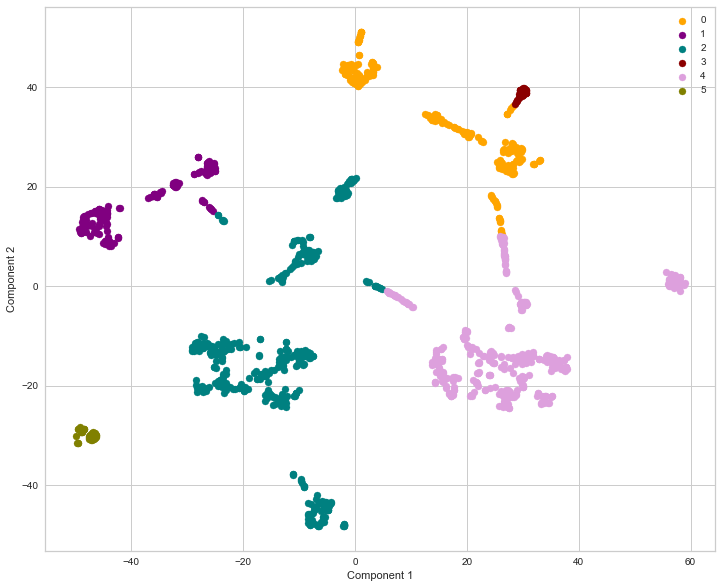

In [12]:
kmeans_model = KMeans(n_clusters=6, random_state=0, n_init=20)
labels = kmeans_model.fit_predict(X_train)
unique_lbl = np.unique(labels)
label_ids = range(len(unique_lbl))

plt.figure(figsize=(12, 10))
colors = 'orange', 'purple', 'teal', 'darkred', 'plum', "olive"
for i, c, label in zip(label_ids, colors, unique_lbl):
    plt.scatter(X_train_tsne[labels == i, 0], X_train_tsne[labels == i, 1], c=c, label=label)

plt.xlabel("Component 1")
plt.ylabel("Component 2")    
plt.legend()
plt.show()

## 4. Dimensionality Reduction

### PCA

#### PCA with GNB

In [13]:
gnb_clf_pca = GaussianNB()

num_features_pca_gnb = []
accuracy_gnb_list = []

for i in range (2, 33):
    pca = PCA(n_components=i, random_state=0)
    pca.fit(X_train , y_train)
    pca_train = pca.transform(X_train)
    pca_test = pca.transform(X_test)
    num_features_pca_gnb.append(i)
    gnb_clf_pca.fit(pca_train,y_train)
    y_pred_gnb = gnb_clf_pca.predict(pca_test)
    accuracy = round(accuracy_score(y_test, y_pred_gnb),3) *100
    accuracy_gnb_list.append(accuracy)

In [14]:
acc_df=pd.DataFrame((zip(num_features_pca_gnb, accuracy_gnb_list)),columns =['Number of Features', 'Accuracy'])
acc_df

,Number of Features,Accuracy
0,2,21.7
1,3,27.2
2,4,29.7
3,5,30.7
4,6,35.5
5,7,41.9
6,8,45.0
7,9,47.9
8,10,50.2
9,11,51.8


In [15]:
max_1 = np.max(accuracy_gnb_list)
max_index = accuracy_gnb_list.index(max_1)
num_components_pca_gnb = num_features_pca_gnb.__getitem__(max_index)
print("Max accuracy : " , max_1)
print("Index of max accuracy : " , max_index)
print("Best num of components : " , num_components_pca_gnb)

Max accuracy :  52.400000000000006
Index of max accuracy :  16
Best num of components :  18


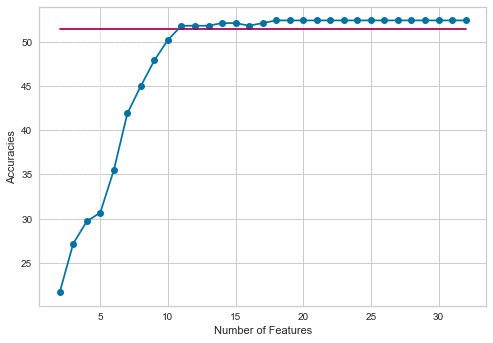

In [16]:
(markers, stemlines, baseline) = plt.stem(num_features_pca_gnb, accuracy_gnb_list , bottom = accuracy_gnb)
plt.setp(stemlines, linestyle="-", color="white", linewidth=0.5 )
plt.plot(num_features_pca_gnb, accuracy_gnb_list)
plt.ylabel('Accuracies')
plt.xlabel('Number of Features')
plt.show()

#### PCA with SVM

In [17]:
svm_model_pca = svm.SVC(random_state=0)

num_features_pca_svm = []
accuracy_svm_list = []

for i in range (2, 33):
    pca = PCA(n_components=i, random_state=0)
    pca.fit(X_train , y_train)
    pca_train = pca.transform(X_train)
    pca_test = pca.transform(X_test)
    num_features_pca_svm.append(i)
    svm_model_pca.fit(pca_train, y_train)
    y_pred_svm_pca = svm_model_pca.predict(pca_test)
    accuracy_svm_pca = round(accuracy_score(y_test, y_pred_svm_pca),3)*100
    accuracy_svm_list.append(accuracy_svm_pca)

In [18]:
acc_df2=pd.DataFrame((zip(num_features_pca_svm, accuracy_svm_list)), columns=['Number of Features', 'Accuracy'])
acc_df2

,Number of Features,Accuracy
0,2,16.6
1,3,16.6
2,4,16.6
3,5,16.6
4,6,16.6
5,7,16.6
6,8,16.6
7,9,16.6
8,10,16.6
9,11,16.6


In [19]:
max_2 = np.max(accuracy_svm_list)
max_index_svm_pca = accuracy_svm_list.index(max_2)
num_components_pca_svm = num_features_pca_svm.__getitem__(max_index_svm_pca)
print("Max accuracy : " , max_2)
print("Index of max accuracy : " , max_index_svm_pca)
print("Best num of components : " , num_components_pca_svm)

Max accuracy :  16.6
Index of max accuracy :  0
Best num of components :  2


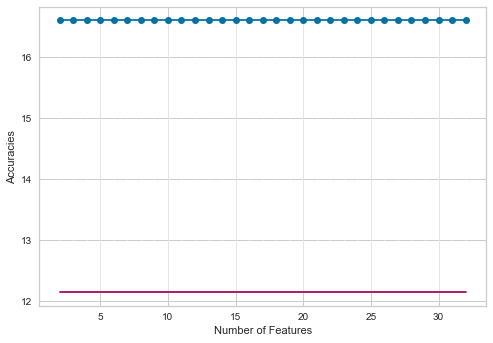

In [20]:
(markers, stemlines, baseline) = plt.stem(num_features_pca_svm, accuracy_svm_list , bottom = accuracy_svm)
plt.setp(stemlines, linestyle="-", color="white", linewidth=0.5 )
plt.plot(num_features_pca_svm, accuracy_svm_list)
plt.ylabel('Accuracies')
plt.xlabel('Number of Features')
plt.show()

## LDA

#### LDA with GNB

In [21]:
clf_gnb = GaussianNB()
    
num_features_lda_gnb = []
accuracy_gnb_list_lda = []

for i in range (2, 17):
    lda = LinearDiscriminantAnalysis(n_components= i)
    lda.fit(X_train, y_train)
    lda_train = lda.transform(X_train)
    lda_test = lda.transform(X_test)
    num_features_lda_gnb.append(i)
    clf_gnb.fit(lda_train,y_train)
    y_pred_gnb = clf_gnb.predict(lda_test)
    accuracy = round(accuracy_score(y_test, y_pred_gnb),3) *100
    accuracy_gnb_list_lda.append(accuracy)

In [22]:
acc_df3=pd.DataFrame((zip(num_features_lda_gnb, accuracy_gnb_list_lda)),columns =['Number of Features', 'Accuracy'])
acc_df3

,Number of Features,Accuracy
0,2,62.0
1,3,76.0
2,4,79.6
3,5,92.7
4,6,92.7
5,7,91.7
6,8,95.8
7,9,95.8
8,10,96.8
9,11,96.8


In [23]:
max_3 = np.max(accuracy_gnb_list_lda)
max_index_gnb_lda = accuracy_gnb_list_lda.index(max_3)
num_components_lda_gnb = num_features_lda_gnb.__getitem__(max_index_gnb_lda)
print("Max accuracy : " , max_3)
print("Index of max accuracy : " , max_index_gnb_lda)
print("Best num of components : " , num_components_lda_gnb)

Max accuracy :  96.8
Index of max accuracy :  8
Best num of components :  10


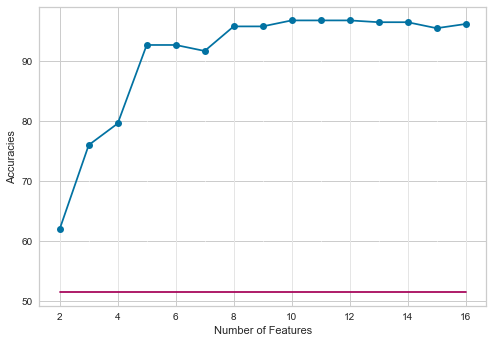

In [24]:
(markers, stemlines, baseline) = plt.stem(num_features_lda_gnb, accuracy_gnb_list_lda , bottom = accuracy_gnb)
plt.setp(stemlines, linestyle="-", color="white", linewidth=0.5 )
plt.plot(num_features_lda_gnb, accuracy_gnb_list_lda)
plt.ylabel('Accuracies')
plt.xlabel('Number of Features')
plt.show()

#### LDA with SVM

In [25]:
svm_model = svm.SVC(random_state=0)
    
num_features_lda_svm = []
accuracy_svm_list_lda = []

for i in range (2, 17):
    lda = LinearDiscriminantAnalysis(n_components=i)
    lda.fit(X_train, y_train)
    lda_train = lda.transform(X_train)
    lda_test = lda.transform(X_test)
    num_features_lda_svm.append(i)
    svm_model.fit(lda_train, y_train)
    y_pred_svm = svm_model.predict(lda_test)
    accuracy = round(accuracy_score(y_test, y_pred_svm),3)*100
    accuracy_svm_list_lda.append(accuracy)

In [26]:
acc_df4=pd.DataFrame((zip(num_features_lda_svm, accuracy_svm_list_lda)), columns=['Number of Features', 'Accuracy'])
acc_df4

,Number of Features,Accuracy
0,2,64.9
1,3,81.5
2,4,87.2
3,5,93.6
4,6,94.2
5,7,94.9
6,8,97.4
7,9,96.8
8,10,97.8
9,11,97.4


In [27]:
max_4 = np.max(accuracy_svm_list_lda)
max_index_svm_lda = accuracy_svm_list_lda.index(max_4)
num_components_lda_svm = num_features_lda_svm.__getitem__(max_index_svm_lda)
print("Max accurcy : " , max_4)
print("Index of max accurcy : " , max_index_svm_lda)
print("Best num of components : " , num_components_lda_svm)

Max accurcy :  97.8
Index of max accurcy :  8
Best num of components :  10


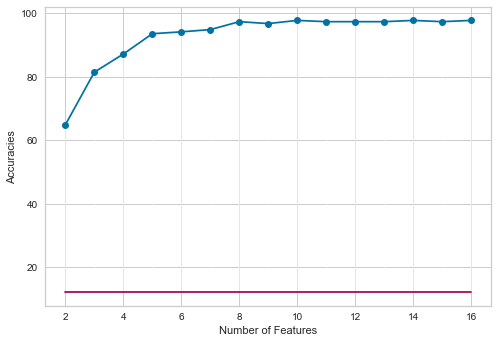

In [28]:
(markers, stemlines, baseline) = plt.stem(num_features_lda_svm, accuracy_svm_list_lda , bottom = accuracy_svm)
plt.setp(stemlines, linestyle="-", color="white", linewidth=0.5 )
plt.plot(num_features_lda_svm, accuracy_svm_list_lda)
plt.ylabel('Accuracies')
plt.xlabel('Number of Features')
plt.show()

## 5. Feature Selection

In [29]:
lda = LinearDiscriminantAnalysis(n_components=10)
lda.fit(X_train, y_train)
lda_train = lda.transform(X_train)
lda_test = lda.transform(X_test)

### Filter Method with GNB

In [30]:
gnb = GaussianNB()

feature_number = []
accuracies = []

for nf in range(2,11):
    fsm = SelectKBest(mutual_info_classif, k=nf)
    fsm.fit(lda_train, y_train)
    fsm_train = fsm.transform(lda_train)
    fsm_test = fsm.transform(lda_test)
    gnb.fit(fsm_train, y_train)
    gnb_pred = gnb.predict(fsm_test) 
    accuracy = accuracy_score(y_test, gnb_pred)*100
    feature_number.append(nf)
    accuracies.append(accuracy)

In [31]:
max_5 = np.max(accuracies)
max_index_gnb_filter = accuracies.index(max_5)
print("Max accuracy : " , max_5)
print("Index of max accuracy : " , max_index_gnb_filter)

Max accuracy :  96.80511182108627
Index of max accuracy :  8


Text(0.5, 0, 'Number of Features')

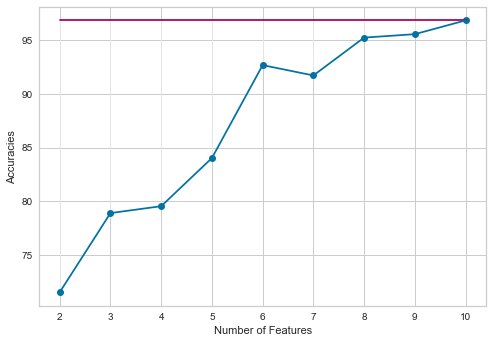

In [32]:
(markers, stemlines, baseline) = plt.stem(feature_number, accuracies, bottom = max_3)
plt.setp(stemlines, linestyle="-", color="white", linewidth=0.5 )
plt.plot(feature_number, accuracies)
plt.ylabel('Accuracies')
plt.xlabel('Number of Features')

### Filter Method with SVM

In [33]:
svm_model = svm.SVC(random_state=0)

feature_number_svm_filter = []
accuracies_svm_filter = []

for nf in range(2,11):
    fsm = SelectKBest(mutual_info_classif, k=nf)
    fsm.fit(lda_train, y_train)
    fsm_train = fsm.transform(lda_train)
    fsm_test = fsm.transform(lda_test)
    svm_model.fit(fsm_train, y_train)
    svm_pred = svm_model.predict(fsm_test) 
    accuracy = accuracy_score(y_test, svm_pred)*100
    feature_number_svm_filter.append(nf)
    accuracies_svm_filter.append(accuracy)

In [34]:
max_6 = np.max(accuracies_svm_filter)
max_index_svm_filter = accuracies_svm_filter.index(max_6)
print("Max accurcy : " , max_6)
print("Index of max accuracy : " , max_index_svm_filter)

Max accurcy :  97.76357827476039
Index of max accuracy :  8


Text(0.5, 0, 'Number of Features')

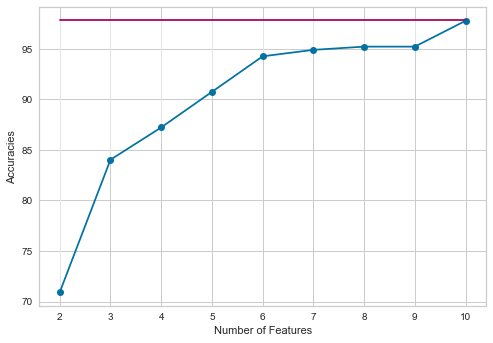

In [35]:
(markers, stemlines, baseline) = plt.stem(feature_number_svm_filter, accuracies_svm_filter , bottom = max_4)
plt.setp(stemlines, linestyle="-", color="white", linewidth=0.5 )
plt.plot(feature_number_svm_filter, accuracies_svm_filter)
plt.ylabel('Accuracies')
plt.xlabel('Number of Features')

### Wrapper Method with GNB

In [36]:
gnb = GaussianNB()

feature_number_gnb_wrapper = []
accuracies_gnb_wrapper = []

for nf in range(2,10):
    sfs = SequentialFeatureSelector(gnb, n_features_to_select=nf)
    sfs.fit(lda_train, y_train)
    sfs_train = sfs.transform(lda_train)
    sfs_test = sfs.transform(lda_test)
    gnb.fit(sfs_train, y_train)
    gnb_pred = gnb.predict(sfs_test) 
    accuracy = accuracy_score(y_test, gnb_pred)*100
    feature_number_gnb_wrapper.append(nf)
    accuracies_gnb_wrapper.append(accuracy)

In [37]:
max_7 = np.max(accuracies_gnb_wrapper)
max_index_gnb_wrapper = accuracies_gnb_wrapper.index(max_7)
print("Max accuracy : " , max_7)
print("Index of max accuracy : " , max_index_gnb_wrapper)

Max accuracy :  96.1661341853035
Index of max accuracy :  7


Text(0.5, 0, 'Number of Features')

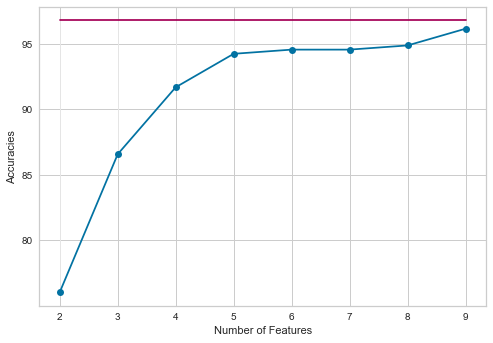

In [38]:
(markers, stemlines, baseline) = plt.stem(feature_number_gnb_wrapper, accuracies_gnb_wrapper , bottom = max_3)
plt.setp(stemlines, linestyle="-", color="white", linewidth=0.5 )
plt.plot(feature_number_gnb_wrapper, accuracies_gnb_wrapper)
plt.ylabel('Accuracies')
plt.xlabel('Number of Features')

### Wrapper Method with SVM

In [39]:
svm_model = svm.SVC(random_state=0)

feature_number_svm_wrapper = []
accuracies_svm_wrapper = []

for nf in range(2,10):
    sfs = SequentialFeatureSelector(svm_model, n_features_to_select=nf)
    sfs.fit(lda_train, y_train)
    sfs_train = sfs.transform(lda_train)
    sfs_test = sfs.transform(lda_test)
    svm_model.fit(sfs_train, y_train)
    svm_pred = svm_model.predict(sfs_test) 
    accuracy = accuracy_score(y_test, svm_pred)*100
    feature_number_svm_wrapper.append(nf)
    accuracies_svm_wrapper.append(accuracy)

In [40]:
max_8 = np.max(accuracies_svm_wrapper)
max_index_svm_wrapper = accuracies_svm_wrapper.index(max_8)
print("Max accuracy : " , max_8)
print("Index of max accuracy : " , max_index_svm_wrapper)

Max accuracy :  97.76357827476039
Index of max accuracy :  6


Text(0.5, 0, 'Number of Features')

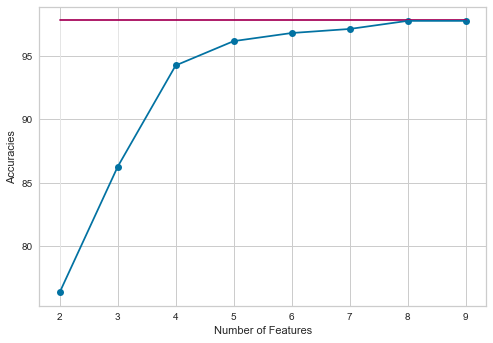

In [41]:
(markers, stemlines, baseline) = plt.stem(feature_number_svm_wrapper, accuracies_svm_wrapper , bottom = max_4)
plt.setp(stemlines, linestyle="-", color="white", linewidth=0.5 )
plt.plot(feature_number_svm_wrapper, accuracies_svm_wrapper)
plt.ylabel('Accuracies')
plt.xlabel('Number of Features')

## 6. Choose the best number of cluster for k-means clustering algorithm on the processed data

### LDA + Sequential Feature Selector-SVM with 8 components and Apply Kmeans

In [42]:
lda = LinearDiscriminantAnalysis(n_components=10)
lda.fit(X_train, y_train)
lda_train = lda.transform(X_train)

svm_model = svm.SVC(random_state=0)
sfs = SequentialFeatureSelector(svm_model, n_features_to_select=8)
sfs.fit(lda_train, y_train)
sfs_train = sfs.transform(lda_train)
sfs_test = sfs.transform(lda_test)

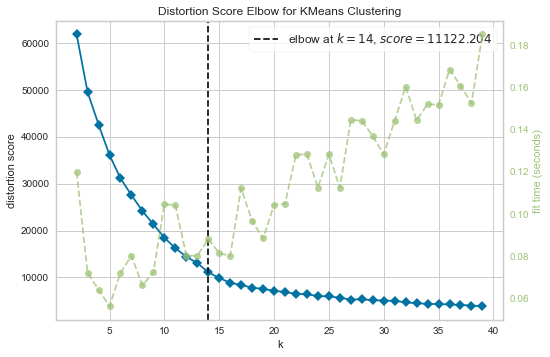

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [43]:
model = KMeans(random_state=0)
visualizer = KElbowVisualizer(model, k=(2,40),metric='distortion')
visualizer.fit(sfs_train)        # Fit the data to the visualizer
visualizer.show()  

In [44]:
kmeans = KMeans(n_clusters=14, random_state=0)
kmeans_lda = kmeans.fit_predict(sfs_train)

silhouette_avg = silhouette_score(sfs_train, kmeans_lda)
# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(sfs_train, kmeans_lda)
silhouette_avg

0.5341587118679322

SilhouetteVisualizer(ax=<AxesSubplot:>, colors='yellowbrick',
                     estimator=KMeans(n_clusters=14, random_state=0))

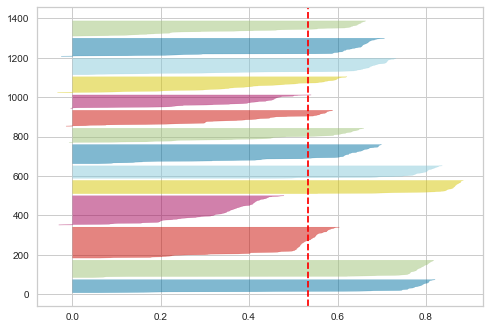

In [45]:
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(sfs_train)

In [46]:
def unsupervisedLabelMap(labels, y):
    labelDict = dict()
    for label in unique_labels(labels):
        tmpY = y[labels == label]
        unique, count = np.unique(tmpY, return_counts=True)
        trueLabel = unique[np.argmax(count)]
        labelDict[label] = trueLabel
    return labelDict


def usLabels2sLabels(labels, y):
    sLabels = np.empty(labels.shape, labels.dtype)
    labelDict = unsupervisedLabelMap(labels, y)
    for usl, tl in labelDict.items():
        sLabels[labels == usl] = tl
    return sLabels

## 7. SOM Algorithm

Text(0, 0.5, 'Accuracy')

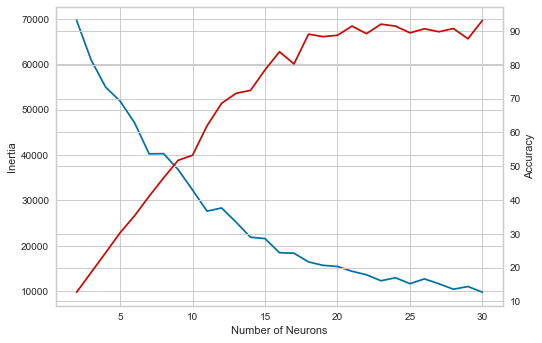

In [58]:
wss = []
accuracies = []

for neurons in range(2,31):
    som_model = SOM(m=neurons,n=1,dim=8, random_state=0)
    som_labels = som_model.fit_predict(sfs_train)
    predY = usLabels2sLabels(som_labels, y_train)
    accuracy = accuracy_score(y_train, predY)*100
    accuracies.append(accuracy)
    inertia = som_model.inertia_
    wss.append(inertia)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(range(2,31), wss, c="b")
ax2.plot(range(2,31), accuracies, c="r")

ax1.set_xlabel('Number of Neurons')
ax1.set_ylabel('Inertia')
ax2.set_ylabel('Accuracy')

In [61]:
som = MiniSom(17, 17, sfs_train.shape[1], random_seed=0)
initial_weights = som.random_weights_init(sfs_train)

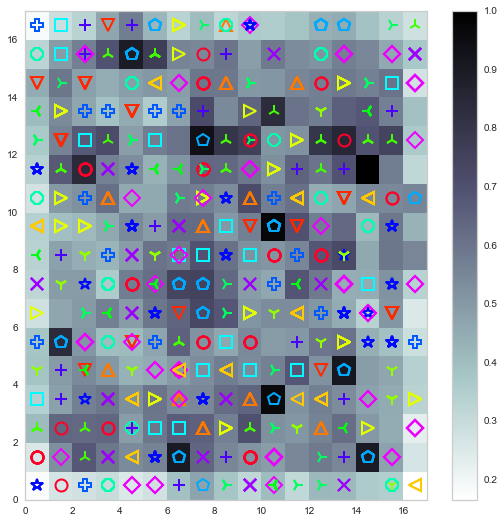

In [62]:
plt.figure(figsize=(9, 9))

plt.pcolor(som.distance_map().T, cmap='bone_r')  # plotting the distance map as background
plt.colorbar()

target_lbl = np.unique(train_df['type1'])
NUM_COLORS = 17
cm = plt.get_cmap('gist_rainbow')
colors = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]
markers = ["o","v","^","<",">","1","2","3","4","8","s","p","P","*","+","x","D"]

for index, xx in enumerate(sfs_train):
    w = som.winner(xx) 
    plt.plot(w[0]+.5, w[1]+.5, markers[y_train[index]], markerfacecolor='None', markeredgecolor=colors[y_train[index]], markersize=12, markeredgewidth=2)

plt.show()

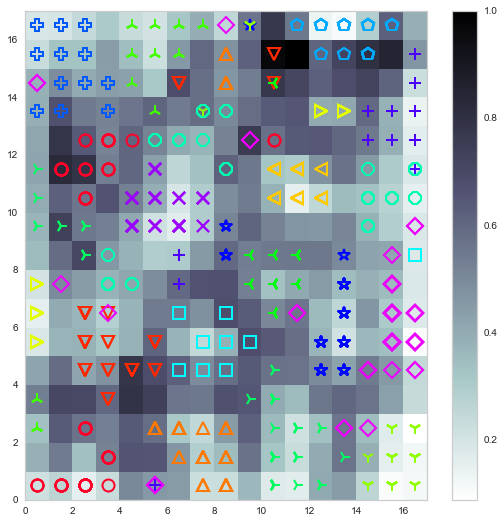

In [66]:
plt.figure(figsize=(9, 9))

plt.pcolor(som.distance_map().T, cmap='bone_r')  # plotting the distance map as background
plt.colorbar()

target_lbl = np.unique(train_df['type1'])
NUM_COLORS = 17
cm = plt.get_cmap('gist_rainbow')
colors = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]
markers = ["o","v","^","<",">","1","2","3","4","8","s","p","P","*","+","x","D"]

som.train(sfs_train, 4000)
for index, xx in enumerate(sfs_train):
    w = som.winner(xx) 
    plt.plot(w[0]+.5, w[1]+.5, markers[y_train[index]], markerfacecolor='None', markeredgecolor=colors[y_train[index]], markersize=12, markeredgewidth=2)

plt.show()

## 8. DBSCAN Algorithm

100%|██████████████████████████████████████████████████████████████████████████████████| 58/58 [00:16<00:00,  3.43it/s]


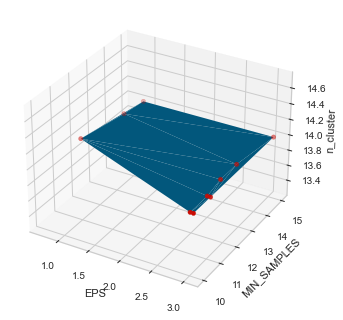

Number of Clusters:  [14 14 14 14 14 14 14 14 14 14]
Epsilon:  [0.7  0.85 0.9  3.   3.05 3.05 3.   3.05 2.95 2.95]
Minpoint:  [12 14 15 10 10 11 11 15 13 12]
Accuracy:  [33.57314149 40.76738609 41.48681055 68.58513189 68.58513189 68.58513189
 68.58513189 72.58193445 74.10071942 74.02078337]


In [51]:
epsList, msList, accList , n_cluster = list(), list(), list(), list()
for eps in tqdm(np.arange(.2, 3.1, 0.05)):
    for ms in range(2, 16):
        model = DBSCAN(eps=eps, min_samples=ms)
        predClusters = model.fit_predict(sfs_train)
        predY = usLabels2sLabels(predClusters, y_train)
        accuracy = accuracy_score(y_train, predY)*100
        n_clusters_ = len(set(predClusters)) - (1 if -1 in labels else 0)
        n_cluster.append(n_clusters_)
        epsList.append(eps)
        msList.append(ms)
        accList.append(accuracy)
        
epsList, msList, accList , n_cluster = np.array(epsList), np.array(msList), np.array(accList), np.array(n_cluster)

i = np.where(n_cluster==14)
max_index = np.argpartition(accList[i], -10)[-10:]

# xx, yy = np.meshgrid(range(epsList.shape[0]), range(msList.shape[0]))
# zz = 14
# ax.plot_surface(xx, yy, np.atleast_2d(zz), color="r")

ax = plt.axes(projection='3d')
ax.plot_trisurf(epsList[i][max_index], msList[i][max_index], n_cluster[i][max_index])
ax.scatter(epsList[i][max_index], msList[i][max_index], n_cluster[i][max_index], color="r")
ax.set_xlabel('EPS')
ax.set_ylabel('MIN_SAMPLES')
ax.set_zlabel('n_cluster')
plt.show()

print("Number of Clusters: ", n_cluster[i][max_index])
print("Epsilon: ", epsList[i][max_index])
print("Minpoint: ", msList[i][max_index])
print("Accuracy: ", accList[i][max_index])